In [25]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
import numpy as np

So, I sorted the values in excel prior to loading the dataset   
Below, I am reading in the file and checking it to see if it loads

In [11]:
cars = pd.read_csv('car_data.csv')
cars.head(2)

,weight,hwy_mpg
0,1488,53
1,1713,54


1.) Scatterplot of the highway miles per gallon versus the weight  
2.) The general trend is the heavier the vehicle the less miles per gallon it gets. The fuel efficiency is decreasing.  
3.) I would expect the slope to be negative because as the x value ascends higher the y value descends lower  
4.) For every unit of weight, the highway mpg decreases by .05. 

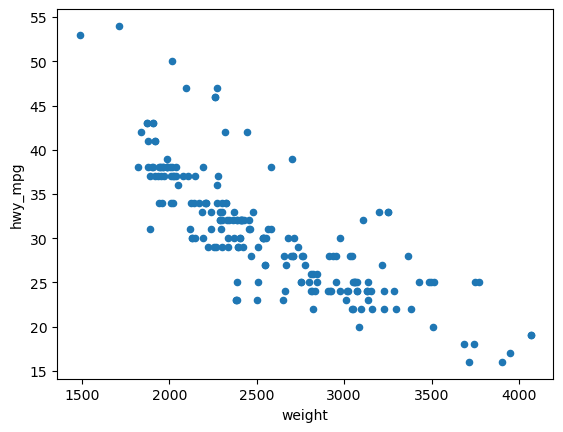

In [12]:
Plot = cars.plot.scatter(x='weight', y='hwy_mpg')

5.) First attempt, in order:  
-finding the delta value y2-y1. I Chose the first two y values  from the dataframe
-finding the delta value of x2-x1. I Chose the first two x values from the dataframe 
-finding the value of m (slope) by dividing the delta values of y over x.  
-choosing two values from the dataframe and giving them variable names x1, y1  
-plugging values into point-slope formula  
-creating an empty array
-creating a function that generates a linear function
-looping through each value into the function and appending it into the empty array
-plotting my results

Findings: after some deliberation and adjustments this outcome does not provide the line of best fit

1488 53
46.38666666666667
[39.77333333333334, 38.77333333333334, 38.30222222222223, 38.22222222222223]


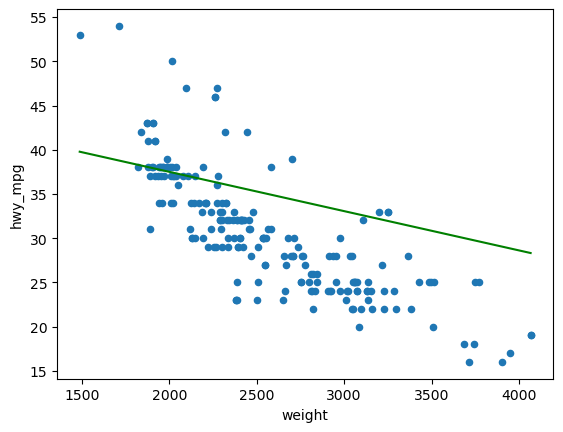

In [17]:
delta_yvalue = (cars.hwy_mpg[1] - cars.hwy_mpg[0])
delta_xvalue = (cars.weight[1] - cars.weight[0])
m = -(delta_yvalue / delta_xvalue)

x1 = cars.weight[0]
y1 = cars.hwy_mpg[0]
print(x1,y1)

b = (m * x1) + y1
print(b)

y_array = []
n = len(x)

def f(x):
    value = (m*x) + b
    return value

for i in range(n):
    y = f(x[i])
    y_array.append(y)
print(y_array[:4])

cars.plot.scatter(x='weight', y='hwy_mpg')
plt.plot(x, y_array, color='green')
plt.show()

Second Attempt:  
-naming x and y values into variables  
-finding the line of best fit using variables defined into polyfit() function  
-plotting findings  

Results: This attempt was succesful at finding the best fit line. Compared to my previous attempt I can see my slope is incorrect  

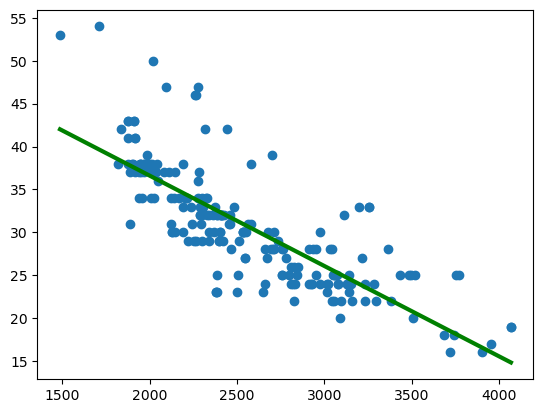

In [14]:
x = np.array(cars.weight)
y = np.array(cars.hwy_mpg)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linewidth=3)  

6.) Using scikitlearn package to find the line of best fit and comparing version to previous attempts

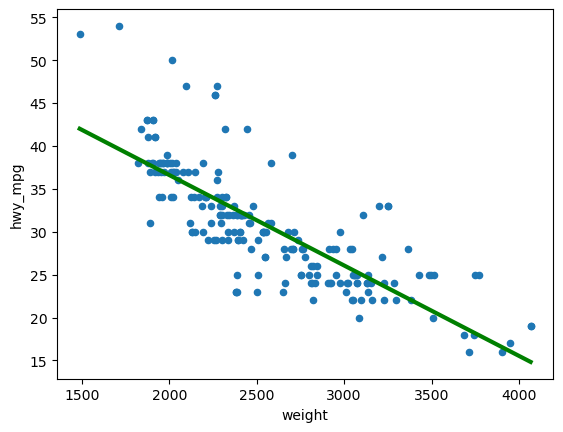

In [15]:
#converting columns to list
weight_list = cars['weight'].tolist()
mpg_list = cars['hwy_mpg'].tolist()
#converting lists to numpy lists
xs = np.array(weight_list)
ys = np.array(mpg_list)
#linear regression object
weight_mpg = linear_model.LinearRegression()
#training model using sets
weight_mpg.fit(xs.reshape(-1,1),ys)
#getting regression line
regression_line = weight_mpg.predict(xs.reshape(-1,1))
                                     
cars.plot.scatter(x='weight', y='hwy_mpg')
plt.plot(xs,regression_line, label='Best fit Line', color='green', linewidth=3)
plt.show()

Below, I am reviewing the regression score, the coefficient, and the y-intercept to use later for the rmse

In [19]:
xreg = np.array(cars["weight"]).reshape(-1, 1)
yreg = np.array(cars["hwy_mpg"]).reshape(-1, 1)
reg = LinearRegression()
reg.fit(xreg,yreg)
print(reg.score(xreg,yreg))

0.635950094928065


In [20]:
reg.coef_

array([[-0.01054716]])

In [21]:
reg.intercept_

array([57.70517423])

7.) In order: 
-Calculate RMSE for the actual values
-Calculate RMSE for the predicted values with the first attempt in probolem 4

In [36]:
values = 57.70517423 -(0.01054716 * cars["weight"])

mse = mean_squared_error(cars["hwy_mpg"], values)
rmse = math.sqrt(mse)
print("rmse actual line: ",rmse)

rmse actual line:  4.144895442078578


In [42]:
mse2 = mean_squared_error(cars["hwy_mpg"], y_array)
rmse2 = math.sqrt(mse2)
print("rmse of prediction line: ",rmse2)

rmse of prediction line:  6.747129376322728


8.) If I used the first attempt at predictions in number five the mpg for a car that weighs 3200 would be slightly over 30. However, using other second model the mpg would be slightly under 25.  
23 to be exact

In [40]:
x_value = 3200
predict_value = 55 + (-.01 * x_value)
print(predict_value)

23.0
